In [45]:
%matplotlib inline
import scipy.fftpack as fft
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# first test fft and rfft and its reverses
N = 10000
x = np.random.rand(10000)
x=x/x.mean()
yi_np = np.fft.fft(x)
yr_np = np.fft.rfft(x)
yi_sci = fft.fft(x)
yr_sci =fft.rfft(x)

In [47]:
print(yi_np.shape)
print(yr_np.shape)
print(yi_sci.shape)
print(yr_sci.shape)

(10000,)
(5001,)
(10000,)
(10000,)


In [48]:
# normalization constant is N for all ffts
yr_np

array([10000.         +0.j        ,    11.69951649-63.83056934j,
          59.89890828 +1.87871761j, ...,   -36.77544533 -3.11293686j,
          15.63662893 +1.86766995j,  -126.32299905 +0.j        ])

In [49]:
# scipy real fft has weird data format
yr_sci

array([ 1.00000000e+04,  1.16995165e+01, -6.38305693e+01, ...,
        1.56366289e+01,  1.86766995e+00, -1.26322999e+02])

In [50]:
yi_np

array([10000.         +0.j        ,    11.69951649-63.83056934j,
          59.89890828 +1.87871761j, ...,   -59.41722649+20.11272094j,
          59.89890828 -1.87871761j,    11.69951649+63.83056934j])

In [51]:
yi_sci

array([10000.         +0.j        ,    11.69951649-63.83056934j,
          59.89890828 +1.87871761j, ...,   -59.41722649+20.11272094j,
          59.89890828 -1.87871761j,    11.69951649+63.83056934j])

In [52]:
# lets try to do a backwards real fft with a Gaussian distribtion
# 1/sqrt(2*Pi*sigma^2)*exp(-x^2/2/sigma^2)
def gaussian(x,sigma):
    return np.exp(-x**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma

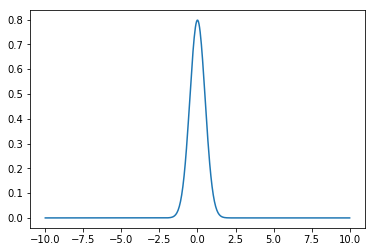

In [91]:
x = np.linspace(-10,10,512)
g = np.fft.fftshift(gaussian(x,0.5))
plt.plot(x,np.fft.fftshift(g))

In [85]:
g_ffti = np.fft.fft(g)
g_fftr = np.fft.rfft(g)

In [82]:
g_fftr

array([ 2.55499861e+01+0.00000000e+00j,  2.09889764e+01+1.28788363e-01j,
        1.16356512e+01+1.42798092e-01j,  4.35304123e+00+8.01388311e-02j,
        1.09897423e+00+2.69783031e-02j,  1.87247799e-01+5.74649359e-03j,
        2.15181875e-02+7.92561776e-04j,  1.67857482e-03+7.21416112e-05j,
        8.01272639e-05+3.93640006e-06j,  9.57157303e-06+5.29111901e-07j,
       -5.65916329e-06-3.47678351e-07j,  5.08088993e-06+3.43457161e-07j,
       -4.51310915e-06-3.32906931e-07j,  4.02292559e-06+3.21579044e-07j,
       -3.59894442e-06-3.09922564e-07j,  3.23176055e-06+2.98290279e-07j,
       -2.91301678e-06-2.86907110e-07j,  2.63548298e-06+2.75910486e-07j,
       -2.39299794e-06-2.65378474e-07j,  2.18035696e-06+2.55349461e-07j,
       -1.99318363e-06-2.45835753e-07j,  1.82780474e-06+2.36832858e-07j,
       -1.68113726e-06-2.28325807e-07j,  1.55059023e-06+2.20293403e-07j,
       -1.43398157e-06-2.12711073e-07j,  1.32946859e-06+2.05552747e-07j,
       -1.23549041e-06-1.98792091e-07j,  1.15072051

(0, 100)

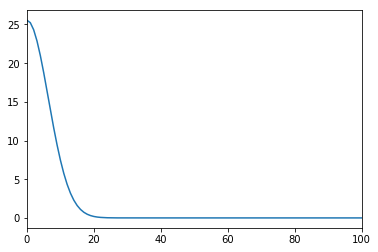

In [88]:
g_fftr = np.real(g_fftr) +0j
plt.plot(np.real(g_fftr))
#plt.plot(np.imag(g_fftr))
plt.xlim((0,100))

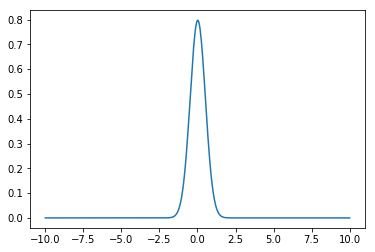

In [92]:
x_back = np.fft.irfft(g_fftr)
plt.plot(x,np.fft.fftshift(x_back))